In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [3]:
df=pd.read_csv("AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
fraud_num=df["isFraud"].value_counts()[1]
rows_num=df.shape[0]
print((fraud_num/rows_num)*100)

0.12908204481801522


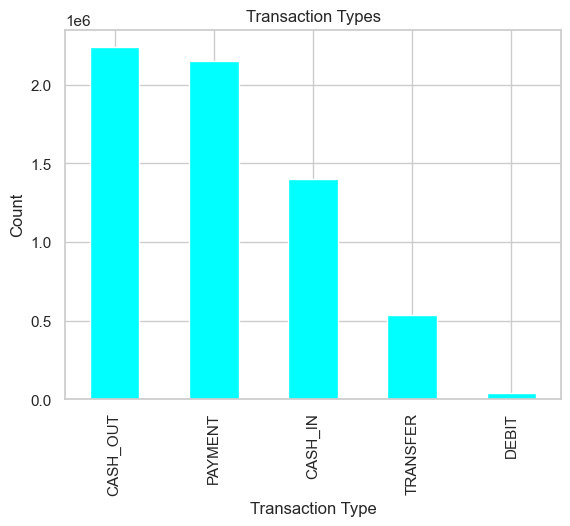

In [6]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="cyan")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


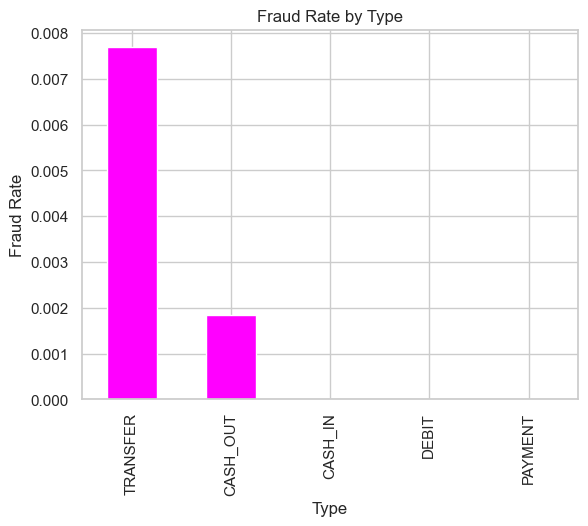

In [7]:
fraud_bytype=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_bytype.plot(kind="bar", title="Fraud Rate by Type", color="Magenta")
plt.ylabel("Fraud Rate")
plt.xlabel("Type")
plt.plot()
print(fraud_bytype)

In [8]:
df["amount"].describe().astype('int')

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

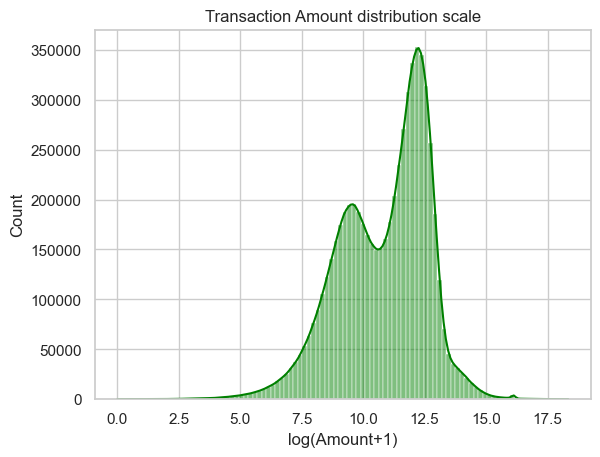

In [9]:
sns.histplot(np.log1p(df["amount"]),bins=100, color="green", kde=True)
plt.title("Transaction Amount distribution scale")
plt.xlabel("log(Amount+1)")
plt.show()


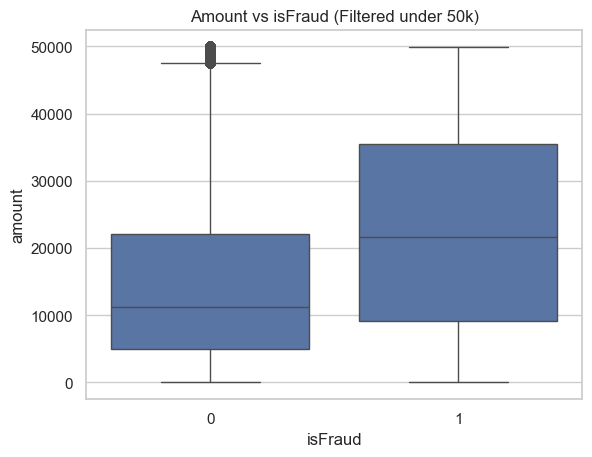

In [10]:
import seaborn as sns
sns.boxplot(data=df[df["amount"]<50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
df["balanceDiffOrg"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["newbalanceDest"]-df["oldbalanceDest"]

In [13]:
print((df["balanceDiffOrg"]<0).sum())
print((df["balanceDiffDest"]<0).sum())

1399253
1238864


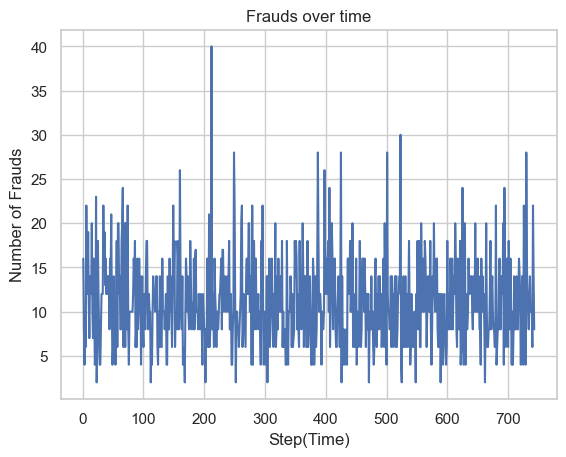

In [14]:
frauds_per_step=df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per Step")
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds over time")
plt.grid(True)
plt.show()

# The results show that the number of frauds don't depend on the time 

In [15]:
df.drop(columns="step", inplace=True)
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [16]:
top_senders=df['nameOrig'].value_counts().head(10)
print(top_senders)
top_receivers=df['nameDest'].value_counts().head(10)
print(top_receivers)

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64


In [17]:
fraud_Orig=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)
print(fraud_Orig)
fraud_Dest=df[df["isFraud"]==1]["nameDest"].value_counts().head(10)
print(fraud_Dest)

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64
nameDest
C967226405     2
C1601170327    2
C650699445     2
C105660024     2
C1981613973    2
C803116137     2
C505532836     2
C964377943     2
C200064275     2
C1259079602    2
Name: count, dtype: int64


In [18]:
fraud_types=df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [19]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

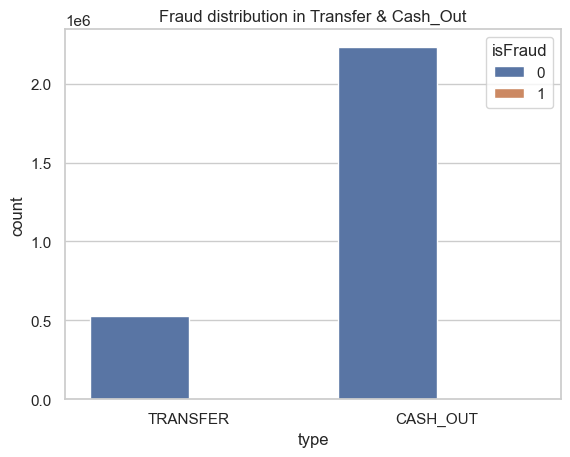

In [20]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud distribution in Transfer & Cash_Out")
plt.show()

In [21]:
corr=df[['amount','oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


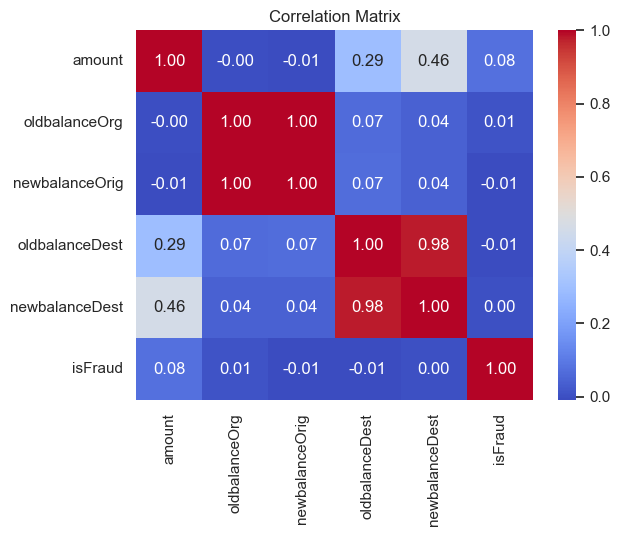

In [22]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [23]:
zero_after_transfer=df[
    (df["oldbalanceOrg"]>0)&
    (df["newbalanceOrig"]==0)&
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]
len(zero_after_transfer)

1188074

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier

In [25]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [26]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [27]:
categorical=["type"]
numerical=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest']

In [28]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

In [30]:
X_train

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrg,balanceDiffDest
4410540,CASH_OUT,74745.13,0.00,0.00,113719.34,188464.47,0.00,74745.13
4910063,CASH_IN,88156.50,13634582.34,13722738.84,1594787.91,1506631.40,-88156.50,-88156.51
256458,PAYMENT,18361.13,348251.67,329890.54,0.00,0.00,18361.13,0.00
4844973,TRANSFER,3367139.52,0.00,0.00,9057290.93,12424430.45,0.00,3367139.52
551103,CASH_OUT,240132.76,70391.95,0.00,462663.12,702795.88,70391.95,240132.76
...,...,...,...,...,...,...,...,...
3588644,CASH_IN,29479.64,2421222.43,2450702.07,39325.39,9845.75,-29479.64,-29479.64
3477109,CASH_OUT,12114.51,0.00,0.00,985498.39,997612.90,0.00,12114.51
4401251,PAYMENT,7159.80,0.00,0.00,0.00,0.00,0.00,0.00
6137983,PAYMENT,8766.76,206456.00,197689.24,0.00,0.00,8766.76,0.00


In [31]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(), numerical),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],
    remainder="drop"
)

In [ ]:
weight=df[df['isFraud']==0].shape[0]/df[df['isFraud']==1].shape[0]
pipeline=Pipeline([
    ("prep",preprocessor),
    ("gbm",LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        num_leaves=31,
        class_weight='balanced', 
        random_state=42
    ))
])

In [49]:
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5749, number of negative: 4448085
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 4453834, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


,steps,"[('prep', ...), ('gbm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [50]:
y_pred=pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.63      0.96      0.76      2464

    accuracy                           1.00   1908786
   macro avg       0.82      0.98      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



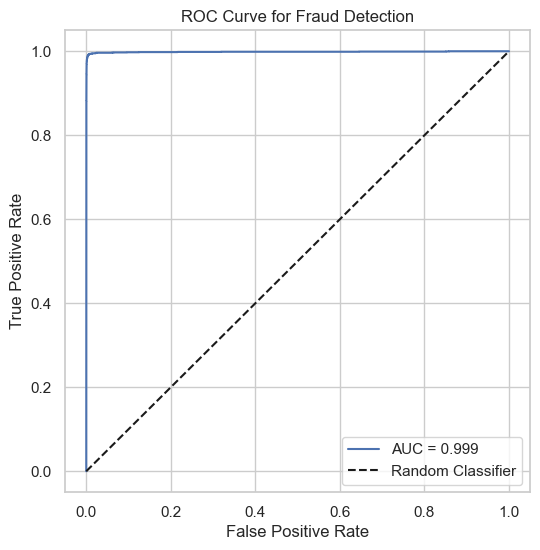

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Suppose you already have:
# y_test → actual labels (0 for non-fraud, 1 for fraud)
# y_pred_proba → predicted probabilities for the positive class (fraud)

# Example:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve for Fraud Detection')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [52]:
confusion_corr=confusion_matrix(y_test,y_pred)
confusion_corr

array([[1904929,    1393],
       [     90,    2374]])

In [53]:
import joblib
joblib.dump(pipeline, "fraud_detection_pipline.pkl")

['fraud_detection_pipline.pkl']

In [54]:
df['newbalanceOrig']

0          160296.36
1           19384.72
2               0.00
3               0.00
4           29885.86
             ...    
6362615         0.00
6362616         0.00
6362617         0.00
6362618         0.00
6362619         0.00
Name: newbalanceOrig, Length: 6362620, dtype: float64